# Low Pass Filter

In [1]:
import pandas as pd
import seaborn as sns
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coordinates = pd.read_csv('3d_coordinates.csv')
coordinates = coordinates.rename(columns={'Unnamed: 0':'frames'}).drop(['frames'], axis=1)

In [3]:
def low_pass_filter(coord):

    #Filter requirements
    T = len(coord)/200 # video time
    fps = 200 # frame per rate
    cutoff = 8 # desired cutoff frequency of the filter
    nyq = 0.5 * fps # Nyquist Frequency
    order = 2 # sin wave can be approx represented as quadratic
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y=np.zeros(coord.shape)*float('NaN')
    y[~np.isnan(coord)] = filtfilt(b, a, coord[~np.isnan(coord)])
    return y

In [4]:
""" Low-pass filter """
bodypart = coordinates[coordinates['bodypart'] == 'wrist']
bodypart_coord = bodypart['x']
y = low_pass_filter(bodypart_coord)
low_pass_bodypart = pd.DataFrame(y, columns = ['x'])
low_pass_bodypart['frame'] = low_pass_bodypart.index

[Text(0.5, 1.0, 'Low pass filter x wrist')]

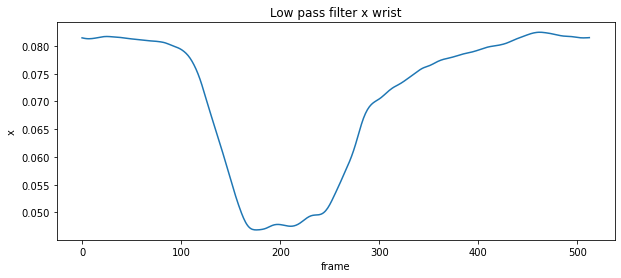

In [5]:
# With Low Pass Filter
plt.figure(figsize=(10, 4))
sns.lineplot(data=low_pass_bodypart, x=low_pass_bodypart['frame'], y=low_pass_bodypart['x']).set(title='Low pass filter x wrist')

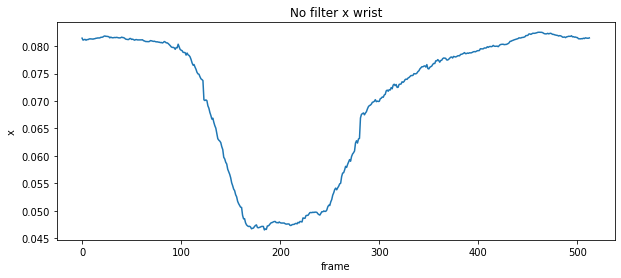

In [6]:
# Without Low Pass Filter
plt.figure(figsize=(10, 4))
z = sns.lineplot(data=bodypart, x=bodypart['frame'], y=bodypart['x']).set(title='No filter x wrist')

In [7]:
bodypart = coordinates[coordinates['bodypart'] == 'thumb1']
bodypart_x = np.array(bodypart['x'])
coord = low_pass_filter(bodypart_x)
low_pass_elbow = pd.DataFrame(coord, columns = ['x'])
low_pass_elbow['frame'] = low_pass_elbow.index
# low_pass_elbow

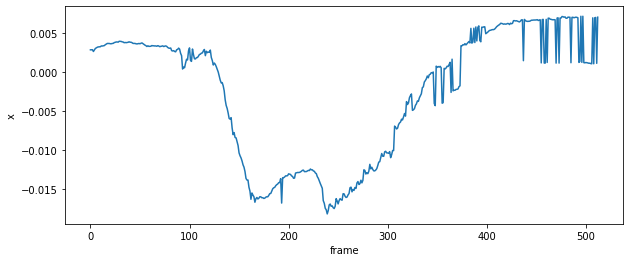

In [8]:
# thumb1 - x - without low pass filter
plt.figure(figsize=(10, 4))
z = sns.lineplot(data=bodypart, x=bodypart['frame'], y=bodypart['x'])

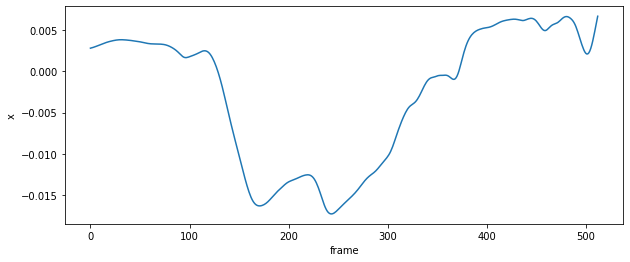

In [9]:
# thumb1 - x - with low pass filter
plt.figure(figsize=(10, 4))
z = sns.lineplot(data=low_pass_elbow, x=low_pass_elbow['frame'], y=low_pass_elbow['x'])